# Project: Test a Perceptual Phenomenon

## Table of Contents
<ul>
<li><a href="#intro">Background Information</a></li>
<li><a href="#question">Questions For Investigation</a></li>
<li><a href="#ref">References</a></li>
</ul>

<a id='intro'></a>
## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words
condition, the words being displayed are color words whose names match the colors in which they are printed: for example, <font color=red>RED</font> , <font color=blue>BLUE</font> . In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example, <font color=green>PURPLE</font> , <font color=purple>ORANGE</font> . In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Style and size of graph
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(7,6)})

<a id='question'></a>
## Questions For Investigation

#### 1. What is our independent variable? What is our dependent variable?
- The **independent** variable is **the word condition: congruent or incongruent.**
- The **dependent** variable is the **time it takes to name the ink colors in equally-sized lists.**

#### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

- The null hypothesis will be $H_{0}$ : The word condition (congruent or incongruent) does not change the time it takes to name the color.
- The alternative hypothesis will be $H_{a}$ : It takes more time to name the color of an incongruent word than a congruent one.

If $\mu_{C}$ is the average time to name colors from a congruent words list and $\mu_{I}$ is the average time to name colors from a congruent words list, then:

\begin{align}
\ H_{0}: \mu_{I} \leq \mu_{C} \\
\ H_{a}: \mu_{I} \gt \mu_{C} \\
\end{align}

- As we recorded the time for each person to complete the 2 tasks (congruent or incongruent), we are in the case of a **dependant test for paired sample**.
- We work on samples and we don't know the population standard deviation. A **t-test** is well suited.
- The alternative hypothesis is that is takes more time to name the color of an incongruent word. The test is directional so we are going to perform a **one-tailed test**.

#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
We can calculate the sample means and the medians as measures of central tendency and the standard deviations as a measure of variability

In [2]:
# Importing the csv file in a dataframe
df = pd.read_csv('stroop_data.csv')
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


For the congruent sample: 
- sample mean $\bar{x_{C}}$ = 14.05
- sample median $m_{C}$ = 14.36
- standard deviation (with Bessel's correction) $s_{C}$ = 3.56  

For the incongruent sample: 
- sample mean $\bar{x_{I}}$ = 22.02
- sample median $m_{I}$ = 21.02
- standard deviation (with Bessel's correction) $s_{I}$ = 4.80

#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
We can plot the 2 samples on boxplots 

Text(0.5, 1.0, 'Samples boxplots')

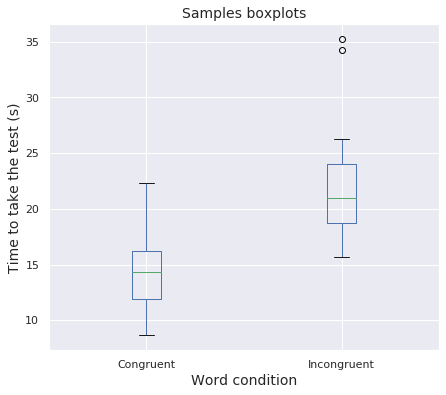

In [3]:
# Boxplots
df.plot(kind = 'box')
# Graph features
plt.xlabel('Word condition', fontsize = 14)
plt.ylabel('Time to take the test (s)', fontsize = 14)
plt.title('Samples boxplots', fontsize = 14)

We can also plot the distributions of the samples.

Text(0.5, 1.0, 'Distribution of samples')

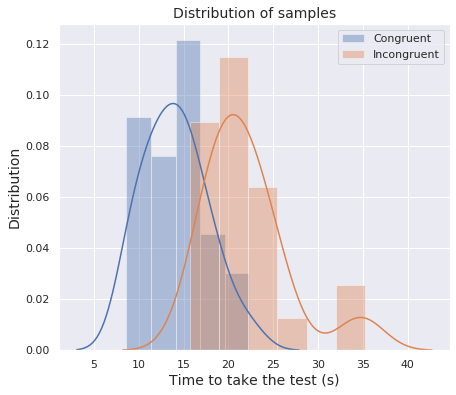

In [4]:
# Displaying the distribution of the samples
sns.distplot(df['Congruent'], label = 'Congruent')
sns.distplot(df['Incongruent'], label = 'Incongruent')
# Graph features
plt.legend()
plt.xlabel('Time to take the test (s)', fontsize = 14)
plt.ylabel('Distribution', fontsize = 14)
plt.title('Distribution of samples', fontsize = 14)

Based on the observation from questions 3 and 4 we can notice that:
- There are 24 rows in each sample which gives a degree of freedom of 23.
- There seems to be a tendency toward the right on the incongruent sample.
- There are 2 outlier points in the incongruent sample.
- The mean, median and modes are pretty close one another showing that the samples tend to follow Normal distributions.

#### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

According to the *t-table*, the $t_{critical}$ for a one-tailed distribution with $\alpha$ = 0.01 and a degree of freedom of 23 is:
\begin{align}
\ t_{critical} = 2.50 \\
\end{align}

The point of estimate is given by the following formula:
\begin{align}
\ M_{D} = \bar{x_{I}} - \bar{x_{C}} = 7.96 \\
\end{align}
Let's now calculate the standard deviation $s_{D}$ of the differences:

In [5]:
df['D'] = df['Incongruent'] - df['Congruent']
s_D = df['D'].std(ddof = 1)
print("Standard deviation of the differences = ",round(s_D,2))

Standard deviation of the differences =  4.86


Now we can calculate the $t_{statistic}$ with the following formula:
\begin{align}
\ t_{statistic} = \frac{\bar{x_{I}} - \bar{x_{C}}}{\frac{s_{D}}{\sqrt{n}}} \\
\end{align}

In [6]:
n = 24
M_D = df['Incongruent'].mean() - df['Congruent'].mean()
t_stat = (M_D)/(s_D/np.sqrt(n))
print("t_statistic = ",round(t_stat,2))

t_statistic =  8.02


The $t_{statistic}$ is way above the $t_{critical}$. The $t_{statistic}$ corresponds to a p-value arround **0.01%** (calculated with https://www.graphpad.com/quickcalcs/)

Thanks to this very low probability, **we are able to reject $H_{0}$**.

Wen can calculated the effect size with the Cohen's d formula:

\begin{align}
\ d = \frac{M_{D}}{s_{D}} \\
\end{align}

In [7]:
d = M_D/s_D
print("Cohen's d = ",round(d,2))

Cohen's d =  1.64


**The means are 1.64 standard deviations apart.**

Finally, we can calculate the confidence interval at 99%:
\begin{align}
\ CI = M_{D} \pm t_{critical} \frac{s_{D}}{\sqrt{n}} \\
\end{align}

In [8]:
CI = (round(M_D - s_D/np.sqrt(n),2), round(M_D + s_D/np.sqrt(n),2))
print("Confidence interval at 99% =",CI)

Confidence interval at 99% = (6.97, 8.96)


The statistical results match with our expectations.

Thanks to this statistical test **it seems that, with a confidence at 99%, it takes in average between arround 7 to 9 more seconds to name the color of an incongruent word than of a congruent one.**   

Limitations : we don't really know if the conditions of the Stroop task samples were controlled: what is the mother tongue of people who took the test ? Is it the first time they took it (carry-over effet) ?

#### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect?

Thanks to some research and and reflexion, this is what I conclude:

For congruent words, as the color matches the word, the only process involved is reading (which is quite automatic). When the word is incongruent, the brain has to solve the conflict, describe the color and avoid acutally reading the word. This increases the workload and the time to perform the task. Even when trying to focus on the color only and somehow try to "deactivate" the reading process, the color naming process remains slow. The brain is more used to read and eventually, the reading process retakes the upper hand.

The Stroop effect experiment can also involve numeric character size. The subject has to say which of 2 numbers is the greatest. The numbers in the pair have different sizes. Example:
- Congruent pair <font size=3>2</font>, <font size=5>8</font>. 
- Incongruent pair <font size=5>2</font>, <font size=3>7</font>. 

In my experience, as a musician, I have been confronted to a Stroop effect phenomenon when reading treble clef (G) and bass clef (F). I learned very young to read notes in the treble clef, so it became as natural as reading words. But on the bass clef, the same note position does not correspond to the same note. So when I began learning cello, it took me a lot more time to decipher a bass clef partition.

<a id='ref'></a>
## References

- https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view
- https://faculty.washington.edu/chudler/java/ready.html
- https://en.wikipedia.org/wiki/Stroop_effect
- http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/
- https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg
- https://www.graphpad.com/quickcalcs/
- https://www.psytoolkit.org/lessons/stroop.html
- https://imotions.com/blog/the-stroop-effect/